
# HEALTHCARE FRAUD DETECTION

In [976]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython import display
import datetime
import stat
import statistics
pd.set_option("display.max.columns", None)



### Load Datasets

In [977]:
df_BENE = pd.read_csv(r"D:\Career Development\Dataset\HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS\Train_Beneficiarydata-1542865627584.csv")
df_IP = pd.read_csv(r"D:\Career Development\Dataset\HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS\Train_Inpatientdata-1542865627584.csv")
df_OP = pd.read_csv(r"D:\Career Development\Dataset\HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS\Train_Outpatientdata-1542865627584.csv")
df_Pro = pd.read_csv(r"D:\Career Development\Dataset\HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS\Train-1542865627584.csv")

### Create Functions 

In [978]:
#Color Map
ascending_colors = ['#0D47A1', '#1976D2', '#1E88E5', '#2196F3', '#42A5F5', '#64B5F6', '#90CAF9', '#BBDEFB', '#E3F2FD', '#caf0f8']
descending_colors = ['#caf0f8', '#E3F2FD', '#BBDEFB', '#90CAF9', '#64B5F6', '#42A5F5', '#2196F3', '#1E88E5', '#1976D2', '#0D47A1']
color_map_as = ListedColormap(ascending_colors)
color_map_ds = ListedColormap(descending_colors)
#labels design 
label_font_dict = {'family':'Verdana','size':14,'color':'#184e77','style':'italic'}
title_font_dict = {'family':'Verdana','size':18,'color':'#184e77','style':'italic'}
#null chart 
def null_chart(data, nameofdataset):
    plt.figure(figsize=(8,5))
    fig = sns.heatmap(pd.DataFrame(data.isnull().sum()), annot=True, fmt="7g", cmap="Blues", cbar=True)
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null counts", fontdict=label_font_dict)
    plt.ylabel("Features Name", fontdict=label_font_dict)
    plt.title(f"{nameofdataset} \n", fontdict=title_font_dict)
    return plt.show()

def cost_subplots(dataframe,colmn1):
    
    cost = dataframe.groupby(colmn1)["InscClaimAmtReimbursed"].agg(['sum', "count"])
    sum_labels = (cost["sum"].values / 1_000_000).astype(int).astype(str) + ' million \n \n' + cost.index.astype(str)
    count_labels = cost["count"].values.astype(str) + " " + " Transactions" + " \n" + cost.index.astype(str) 
    # sum_labels = (cost["sum"].values / 1000000).astype(int).astype(str) + ' million ' + cost.index
    # count_labels = (cost["count"].values).astype(str) + " " + cost.index + " Transaction"
    
    fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    fig.suptitle(f'Examining the influence of {colmn1} on consumption', fontsize=16 , color='#023e8a', style= 'italic' )
    axis[0, 0].pie(cost["sum"], labels=sum_labels, startangle=90 , colors=[ '#0D47A1', '#caf0f8'], wedgeprops={'edgecolor': 'white'})
    axis[0, 0].set_title('Consumption Amount', color='#184e77' )
    axis[0, 1].pie(cost["sum"], labels=cost.index, startangle=90, autopct='%1.1f%%', colors=[ '#0D47A1', '#caf0f8'], wedgeprops={'edgecolor': 'white'})
    axis[0, 1].set_title('Consumption Percentage', color='#184e77')
    axis[1, 0].pie(cost["count"], labels=count_labels, startangle=90, colors=[ '#0D47A1', '#caf0f8'], wedgeprops={'edgecolor': 'white'})
    axis[1, 0].set_title('Number of TRX', color='#184e77')
    axis[1, 1].pie(cost["count"], labels=cost.index, startangle=90, autopct='%1.1f%%', colors=[ '#0D47A1', '#caf0f8'], wedgeprops={'edgecolor': 'white'})
    axis[1, 1].set_title('Number TRX Percentage', color='#184e77')

    return plt.show()



###  *Beneficiary Data EDA*

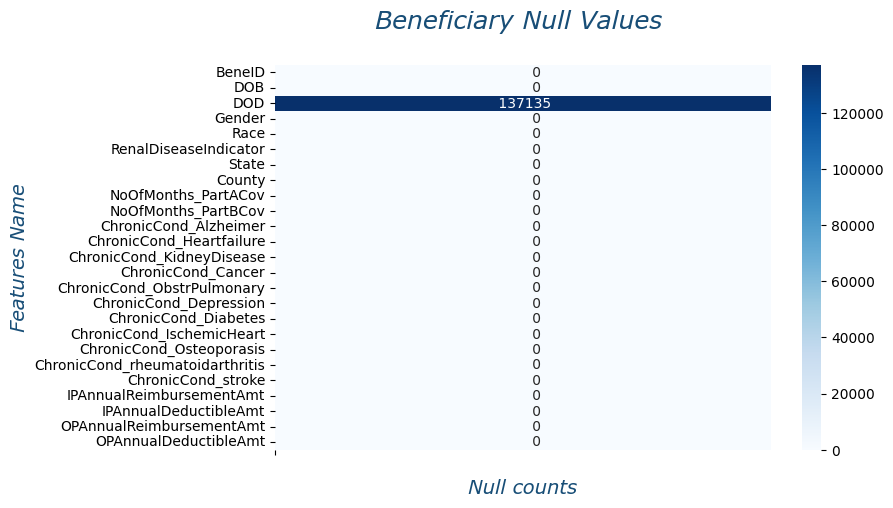

In [979]:
null_chart(df_BENE,"Beneficiary Null Values")

#### *The graph indicates that only the DOD column contains null values.*

In [980]:
df_BENE.shape

(138556, 25)

In [981]:
df_BENE.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [982]:
df_BENE.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


### *Note*
#### Based on the previous exploration, we note the following:

###### 1- Convert "DOB" and "DOD" to date format. 
###### 2- Add age column. 
###### 3- Change RenalDiseaseIndicator and chronic conditions  to zero ones (zero for no & ones for yes) 

##### 1- Convert "DOB" and "DOD" to date format. 


In [983]:
df_BENE["DOB"] = pd.to_datetime(df_BENE["DOB"])
df_BENE["DOD"] = pd.to_datetime(df_BENE["DOD"])

In [984]:
max_DOD = df_BENE["DOD"].max()
max_DOD.year

2009

In [985]:
df_BENE["BENE_Total_consumption"] = df_BENE["IPAnnualReimbursementAmt"] + df_BENE["OPAnnualReimbursementAmt"]

##### 2- Add age column. 


In [986]:
df_BENE["AGE"] = np.where(
    df_BENE["DOD"].isnull(),
    (max_DOD.year) - (df_BENE["DOB"].dt.year),
    (df_BENE["DOD"].dt.year) - (df_BENE["DOB"].dt.year)
)

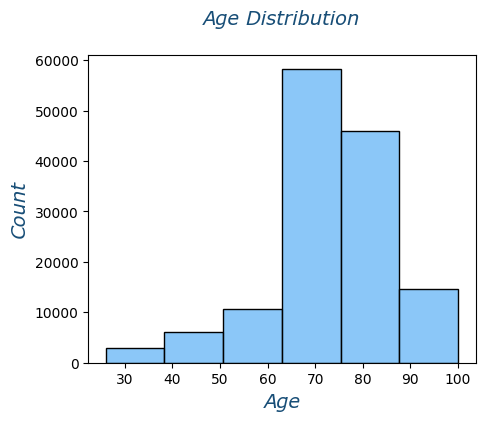

In [987]:
plt.figure(figsize=(5,4))

sns.histplot(df_BENE["AGE"], bins= 6, color=ascending_colors[5])
plt.xlabel("Age", loc="center", fontdict=label_font_dict)
plt.ylabel("Count", loc="center", fontdict=label_font_dict)
plt.title("Age Distribution\n", fontdict=label_font_dict)
plt.show()

##### *The graph shows that most beneficiaries are aged between 65 and 85 years.*

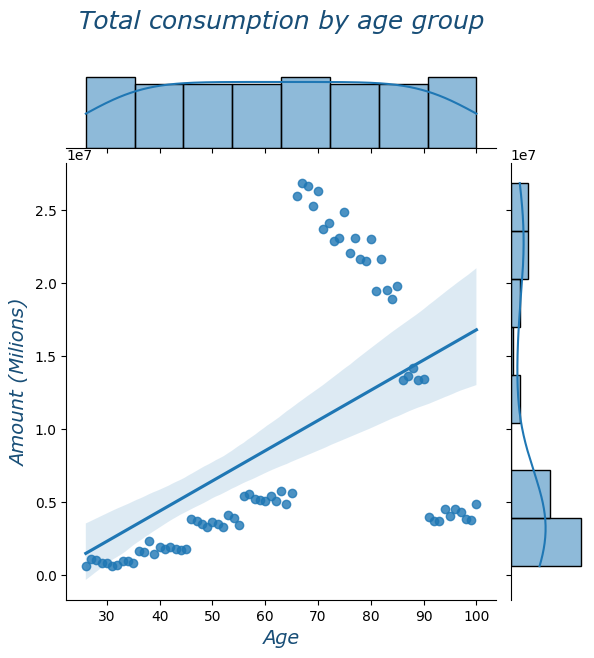

In [988]:
Age_to_IP = df_BENE.groupby(["AGE"],as_index=False)["BENE_Total_consumption"].sum()
sns.jointplot(x='AGE', y='BENE_Total_consumption', data=Age_to_IP, kind='reg', palette=color_map_ds)
plt.xlabel("Age", fontdict=label_font_dict)
plt.ylabel("Amount (Milions)", fontdict=label_font_dict)
plt.title("Total consumption by age group\n\n\n\n", fontdict=title_font_dict)
plt.show()

##### *The graph shows that most beneficiaries consumers are aged between 65 and 85 years.*

##### 3- Change RenalDiseaseIndicator and chronic conditions  to zero ones (zero for no & ones for yes) 

In [989]:
df_BENE["RenalDiseaseIndicator"] = df_BENE["RenalDiseaseIndicator"].map(lambda x: "1" if x == "Y" else "0")


In [990]:
df_BENE[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']] = df_BENE[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].map(lambda x: 0 if x == 2 else 1)

#### *Exploration Chronic condition percentage among the population*

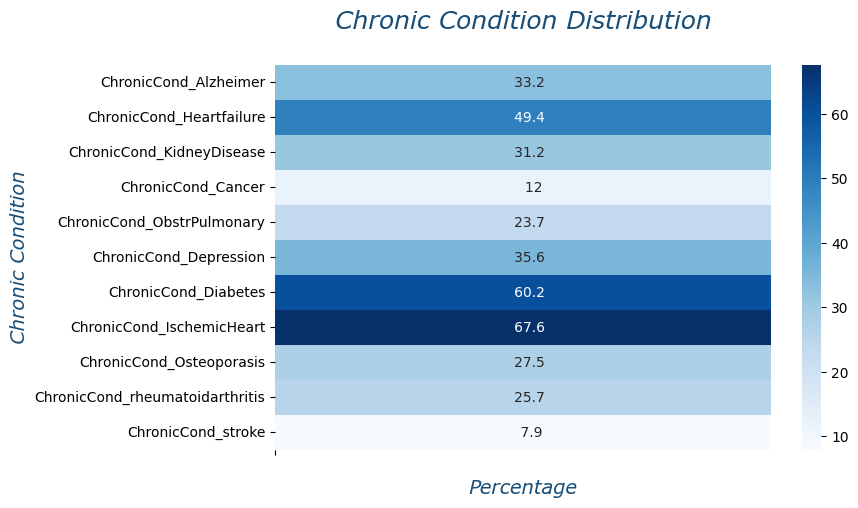

In [991]:
chronic_conditions = df_BENE[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]

chronic_conditions_percentage = (((chronic_conditions.apply(pd.Series.value_counts).T) 
                                  / (df_BENE["BeneID"].count())) * 100).round(1)
chronic_conditions_percentage.columns = ["No (0)", "Yes (1)"]

plt.figure(figsize=(8,5))
sns.heatmap(chronic_conditions_percentage[['Yes (1)']], annot=True, fmt="7g", cmap="Blues", cbar=True)
plt.xticks(labels=[" "], ticks=[0])
plt.xlabel("Percentage", fontdict=label_font_dict)
plt.ylabel("Chronic Condition", fontdict=label_font_dict)
plt.title("Chronic Condition Distribution\n", fontdict=title_font_dict)
plt.show()

#### *Gender Distribution among the population*

In [992]:
df_BENE["Gender"] = df_BENE["Gender"].map(lambda x: 0 if x == 2 else 1)

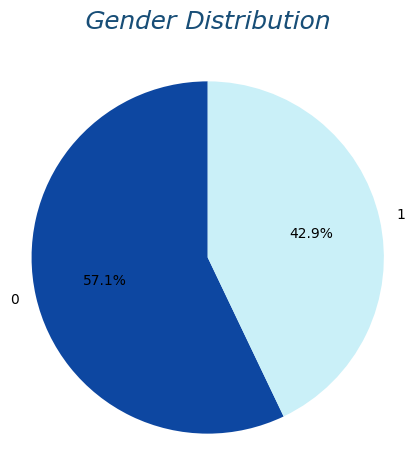

In [993]:
plt.figure(figsize=(5,5))
gender_counts = df_BENE["Gender"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=[ascending_colors[0], ascending_colors[9]])

plt.axis('equal')  
plt.title('Gender Distribution\n', fontdict=title_font_dict)
plt.show()

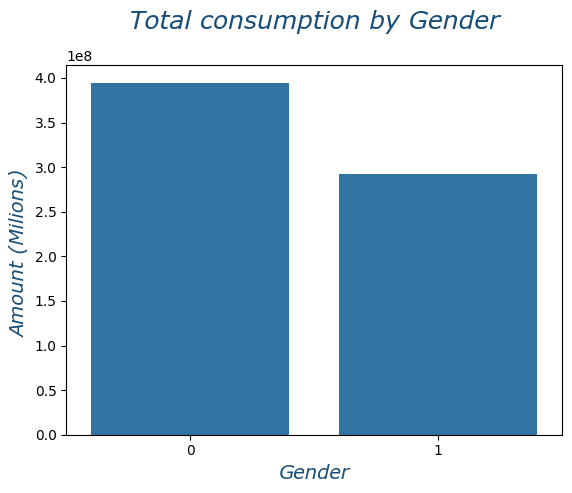

In [994]:
Gender_to_Total = df_BENE.groupby(["Gender"],as_index=False)["BENE_Total_consumption"].sum()
sns.barplot(x='Gender', y="BENE_Total_consumption", data=Gender_to_Total)
plt.xlabel("Gender", fontdict=label_font_dict)
plt.ylabel("Amount (Milions) ", fontdict=label_font_dict)
plt.title("Total consumption by Gender\n", fontdict=title_font_dict)
plt.show()

##### *Add new indicator Dead or alive*

In [995]:
# alive == 0 / Dead == 1
df_BENE["Dead/Alive"] = df_BENE["DOD"].map(lambda x: 0 if pd.isnull(x) else 1)
df_BENE["Dead/Alive"].value_counts()

Dead/Alive
0    137135
1      1421
Name: count, dtype: int64

*Add new indicator AGE Group*
1. to 40  young
2. 40 to 60 Mid 
3. 60 to 80 Old
4. above 80 very old 

In [996]:
def age_group (age):
    if age <= 40:
        return "Young"
    elif age > 40 and age <= 60:
        return "Mid"
    elif age > 60 and age <= 80:
        return "Old"
    else:
        return "Very Old"

df_BENE["AGE GROUP"] = df_BENE["AGE"].apply(age_group)
df_BENE = df_BENE.drop(columns=['Race','State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1)
df_BENE.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'BENE_Total_consumption', 'AGE', 'Dead/Alive',
       'AGE GROUP'],
      dtype='object')

### *Beneficiary Summary:*

* Introduce and integrate new indicators into the analysis: these include ['AGE', 'Dead/Alive' , 'AGE GROUP' , 'BENE_Total_consumption'] for future use 

* Remove certain columns from the dataset that are deemed unnecessary for our analysis: specifically, we will eliminate ['Race','State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov']

* Conduct a thorough analysis of the age distribution within the beneficiary population to understand its implications and potential impact on their consumption patterns. This involves examining how different age groups may influence overall consumption trends.

* Carry out a detailed investigation into the distribution of chronic conditions throughout the entire population, recognizing how these conditions may affect healthcare utilization and quality of life among the beneficiaries.

* Analyze the distribution of gender within the beneficiary group and assess how this demographic factor may influence consumption behaviors and healthcare access among different genders.

## *OutPatient Data EDA*

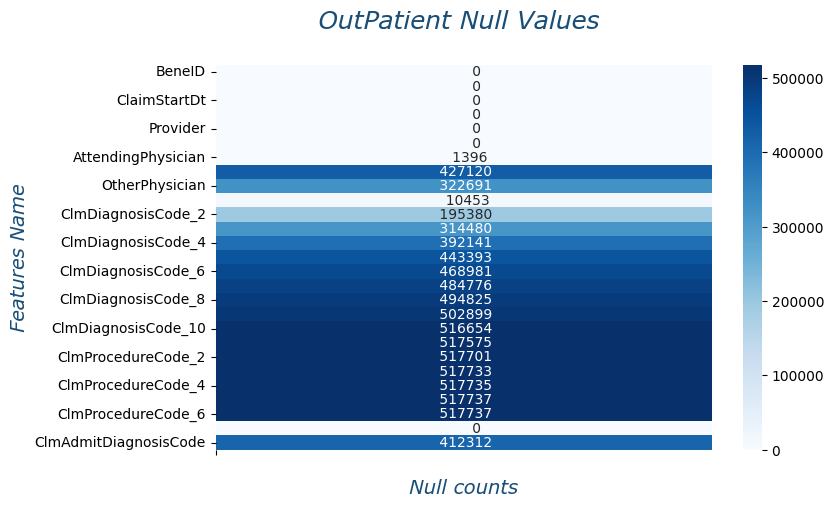

In [997]:
null_chart(df_OP,"OutPatient Null Values")

The graph indicates that most of null values in diagnosis and procedure columns.


In [998]:
df_OP.shape

(517737, 27)

In [999]:
df_OP.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

Discover values variance for each column


In [1000]:
df_OP.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


NOTES:
Based on the previous exploration, we note the following:

1. Convert "ClaimStartDt" and "ClaimEndDt" to date format. 
2. Add an "Claim Clearance length" column. 
3. add new indicator combine diagnose and combine procedure 
4. calculate Z-Score(to detect  anominal values ) for ['Claim Clearance length', 'amount', ] 
5. Hypothesis test for ['Claim Clearance length', 'amount', ] (to flag the values as fraudulent and not fraudulent )
6. add new indicators ['service category' , 'admitted'] 

In [1001]:
df_OP["ClaimEndDt"] = pd.to_datetime(df_OP["ClaimEndDt"])
df_OP["ClaimStartDt"] = pd.to_datetime(df_OP["ClaimStartDt"])


In [1002]:
df_OP["ClaimClearanceLength"] = (df_OP["ClaimEndDt"] - df_OP["ClaimStartDt"])
df_OP["ClaimClearanceLength"] = df_OP["ClaimClearanceLength"].dt.days

In [1003]:
clearanceMean_OP = df_OP["ClaimClearanceLength"].mean()
clearanceStd_OP = df_OP["ClaimClearanceLength"].std()


Z-Scores / Hypothesis Testing.
1. H₀ = There is no significant difference in the claim amount(μ = population mean = 0 = not fraudulent).
2. H₁ = There is a significant difference, indicating potential fraud (μ ≠ population mean = 1 = fraudulent).
3. significance level  == (0.05) and the the critical values are ±1.96.


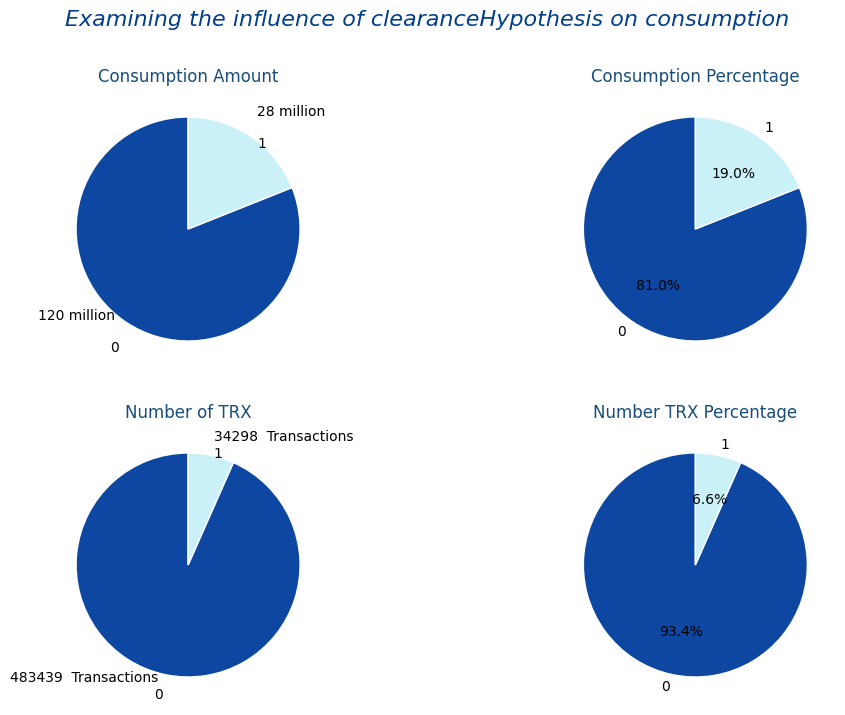

In [1004]:
clearanceMean_OP = df_OP["ClaimClearanceLength"].mean()
clearanceStd_OP = df_OP["ClaimClearanceLength"].std()
df_OP["clearanceZscore"] = (df_OP["ClaimClearanceLength"] - clearanceMean_OP) / clearanceStd_OP
def HypothesisTest(ZScore):
    if -1.96 <= ZScore <= 1.96:
        return 0  # Not fraudulent
    else:
        return 1  # Fraudulent 

    
df_OP["clearanceHypothesis"] = df_OP["clearanceZscore"].apply(HypothesisTest)

cost_subplots(df_OP, "clearanceHypothesis")

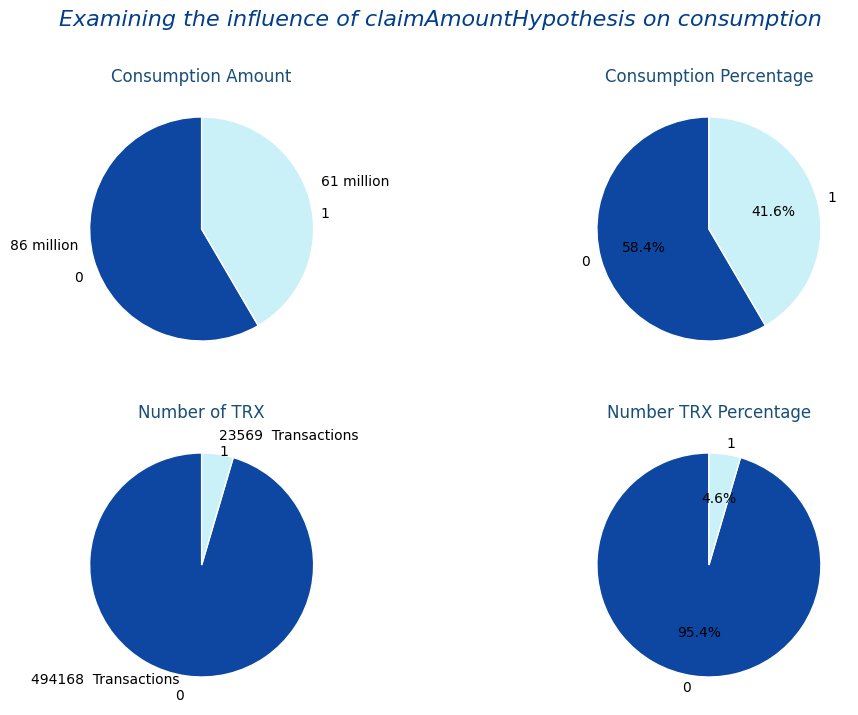

In [1005]:
claimamountMean_OP = df_OP["InscClaimAmtReimbursed"].mean()
claimamountStd_OP = df_OP["InscClaimAmtReimbursed"].std()
df_OP["claimAmountZscore"] = (df_OP["InscClaimAmtReimbursed"] - claimamountMean_OP) / claimamountStd_OP
df_OP["claimAmountHypothesis"] = df_OP["claimAmountZscore"].apply(HypothesisTest)
cost_subplots(df_OP, "claimAmountHypothesis")

what is the relation between claim clearance length and amount?

In [1006]:
claim_clearance_TRX = df_OP.groupby("ClaimClearanceLength")["ClaimClearanceLength"].count().rename("Transaction_Count")
claim_clearance_amount = df_OP.groupby("ClaimClearanceLength")["InscClaimAmtReimbursed"].sum().rename("Total_Claim_Amount")
claim_clearance_TRX_amount = pd.merge(left=claim_clearance_TRX, right=claim_clearance_amount, 
                                    left_index=True, right_index=True).reset_index()
claim_clearance_TRX_amount['AvgClaimAmount'] = np.round(claim_clearance_TRX_amount['Total_Claim_Amount']/claim_clearance_TRX_amount['Transaction_Count'],2)

claim_clearance_TRX_amount




,ClaimClearanceLength,Transaction_Count,Total_Claim_Amount,AvgClaimAmount
0,0,453348,105624910,232.99
1,1,11960,5381060,449.92
2,2,4366,2227230,510.13
3,3,2597,1272800,490.10
4,4,2238,1270910,567.88
5,5,1511,976870,646.51
6,6,1306,571400,437.52
7,7,2564,1280020,499.23
8,8,1189,463190,389.56
9,9,1378,686930,498.50


* The table shows significant variance in claim averages for clearances over 20 days, which may indicate potential fraud.

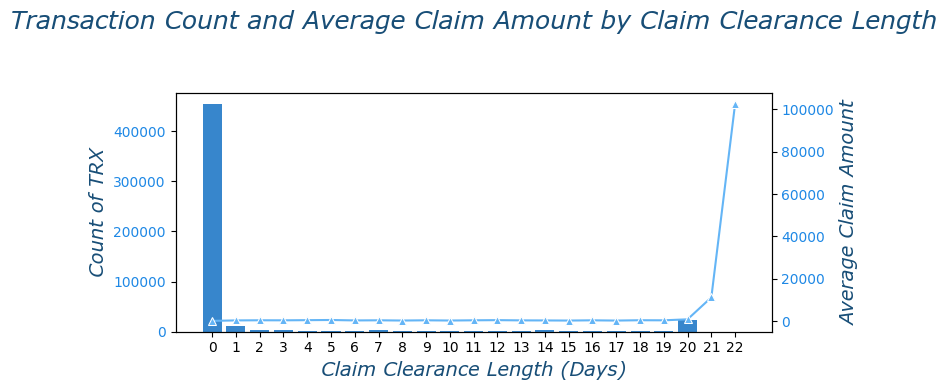

In [1007]:

fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for 'count of TRX'
sns.barplot(data=claim_clearance_TRX_amount, x=claim_clearance_TRX_amount.index, y='Transaction_Count', ax=ax1, color=ascending_colors[2])
ax1.set_xlabel('Claim Clearance Length (Days)', fontdict=label_font_dict)
ax1.set_ylabel('Count of TRX', fontdict=label_font_dict)
ax1.tick_params(axis='y', labelcolor=ascending_colors[2])

# Create a secondary y-axis to plot 'AvgClaimAmount'
ax2 = ax1.twinx()
sns.lineplot(data=claim_clearance_TRX_amount, x=claim_clearance_TRX_amount.index, y='AvgClaimAmount', ax=ax2, color=ascending_colors[5], marker='^')
ax2.set_ylabel('Average Claim Amount', fontdict=label_font_dict)
ax2.tick_params(axis='y', labelcolor= ascending_colors[2])

# Title and layout
plt.title('Transaction Count and Average Claim Amount by Claim Clearance Length\n \n ', fontdict= title_font_dict)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



* The graph indicates that the majority of claims are filed for 0 days, with significantly fewer claims for other durations. 
* There is also a slight spike in claims for a 20-day duration maybe will be sign for fraudulent.

* add new indicators ['service category' , 'admitted'] for future use.

In [1008]:
df_OP["service category"] = "outpatient"
df_OP["admitted"] = 0


* Is there a difference between "OPAnnualReimbursementAmt" and 'InscClaimAmtReimbursed'?
-     If there is a discrepancy in amounts, it may indicate an unusual situation.

In [1009]:
totalamountsperbene_OP1 = df_BENE.groupby('BeneID')["OPAnnualReimbursementAmt"].sum()
totalamountsperbene_OP2 = ((df_OP.groupby('BeneID')['InscClaimAmtReimbursed'].sum()) + (df_OP.groupby('BeneID')['DeductibleAmtPaid'].sum())).rename("OPamount")
mergingOP = pd.merge(left=totalamountsperbene_OP1, right=totalamountsperbene_OP2, on='BeneID' , how="inner")

mergingOP["amountValidation"] = np.where(
    (mergingOP["OPAnnualReimbursementAmt"] != mergingOP["OPamount"]),
    
    1,
    0
)
mergingOP = mergingOP.drop(columns=["OPAnnualReimbursementAmt", "OPamount"])
df_OP = pd.merge(left=df_OP, right=mergingOP, on="BeneID", how="left")


### *Outpatient Summary:*
* Introduce and integrate new indicators into the analysis: these include ['ClaimClearanceLength', 'clearanceZscore',
       'clearanceHypothesis', 'claimAmountZscore', 'claimAmountHypothesis',
       'service category', 'admitted']
* Examine and assess the connection between the duration it takes to clear insurance claims and the corresponding amounts involved in those claims. By doing so, we can gain valuable insights into how these factors influence consumption behaviors as well as healthcare utilization trends among different populations. Understanding this relationship can help us better grasp the implications for both consumers and healthcare providers in the context of financial transactions and service usage.


## *inpatient EDA*


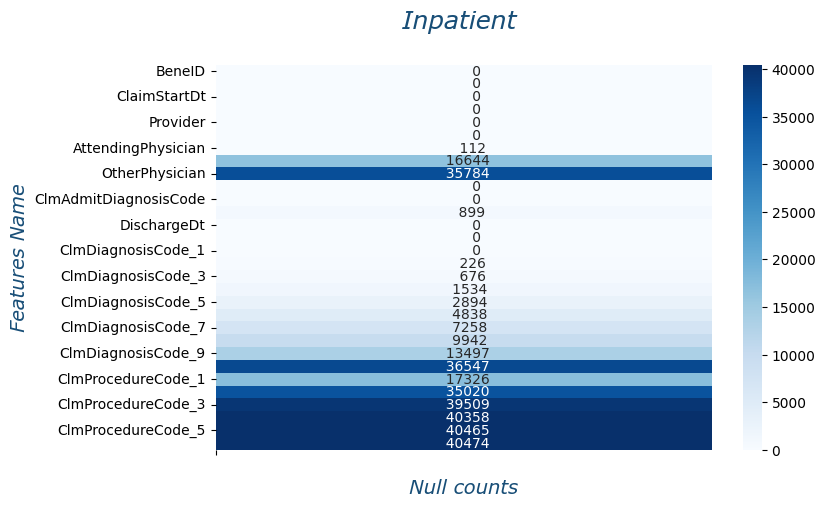

In [1010]:
null_chart(df_IP, "Inpatient")

* The graph shows that there are many null values in the diagnosis and procedure columns. 
* and that "otherphysician" is rarely represented in the Dataset.


In [1011]:
df_IP.shape

(40474, 30)

In [1012]:
df_IP.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [1013]:
df_IP.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### NOTES: Based on the previous exploration, we note the following:

1. Convert ["ClaimStartDt","ClaimEndDt",'AdmissionDt','DischargeDt'] to date format.
2. Add an ["Claim Clearance length", "Accommodation length"] column.
3. add new indicator combine diagnose and combine procedure
4. calculate Z-Score(to detect anominal values ) for ['Claim Clearance length', 'amount', "Accommodation length" ]
5. Hypothesis test for ['Claim Clearance length', 'amount', "Accommodation length" ] (to flag the values as fraudulent and not fraudulent )
6. add new indicators ['service category' , 'admitted'] 

In [1014]:
df_IP["ClaimStartDt"] = pd.to_datetime(df_IP["ClaimStartDt"])
df_IP["ClaimEndDt"] = pd.to_datetime(df_IP["ClaimEndDt"])
df_IP["AdmissionDt"] = pd.to_datetime(df_IP["AdmissionDt"])
df_IP["DischargeDt"] = pd.to_datetime(df_IP["DischargeDt"])

In [1015]:
df_OP.columns
df_IP['ClaimClearanceLength'] = df_IP["ClaimEndDt"] - df_IP["ClaimStartDt"]
df_IP['ClaimClearanceLength'] = df_IP['ClaimClearanceLength'].dt.days 
df_IP["AccommodationLength"] = df_IP["DischargeDt"] - df_IP["AdmissionDt"]
df_IP["AccommodationLength"] = df_IP["AccommodationLength"].dt.days

Z-Scores / Hypothesis Testing.

1. H₀ = There is no significant difference in the claim amount(μ = population mean = 0 = not fraudulent).
2. H₁ = There is a significant difference, indicating potential fraud (μ ≠ population mean = 1 = fraudulent).
3. significance level == (0.05) and the the critical values are ±1.96.

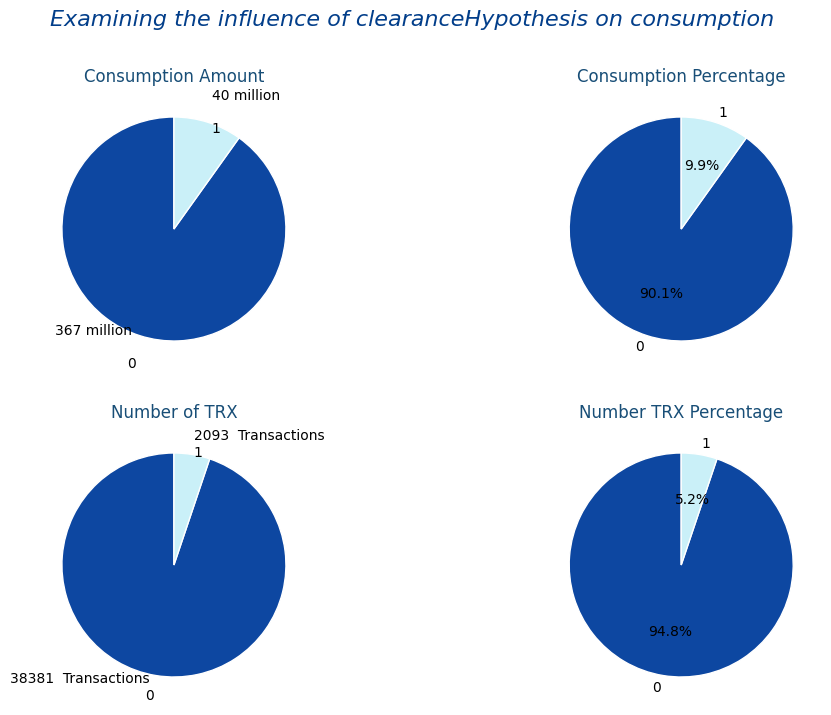

In [1016]:
clearanceMean_IP = df_IP['ClaimClearanceLength'].mean()
clearanceStd_IP = df_IP['ClaimClearanceLength'].std()

df_IP["clearanceZscore"] = (df_IP['ClaimClearanceLength'] - clearanceMean_IP ) / clearanceStd_IP
df_IP["clearanceHypothesis"] = df_IP["clearanceZscore"].apply(HypothesisTest)

cost_subplots(df_IP, "clearanceHypothesis")

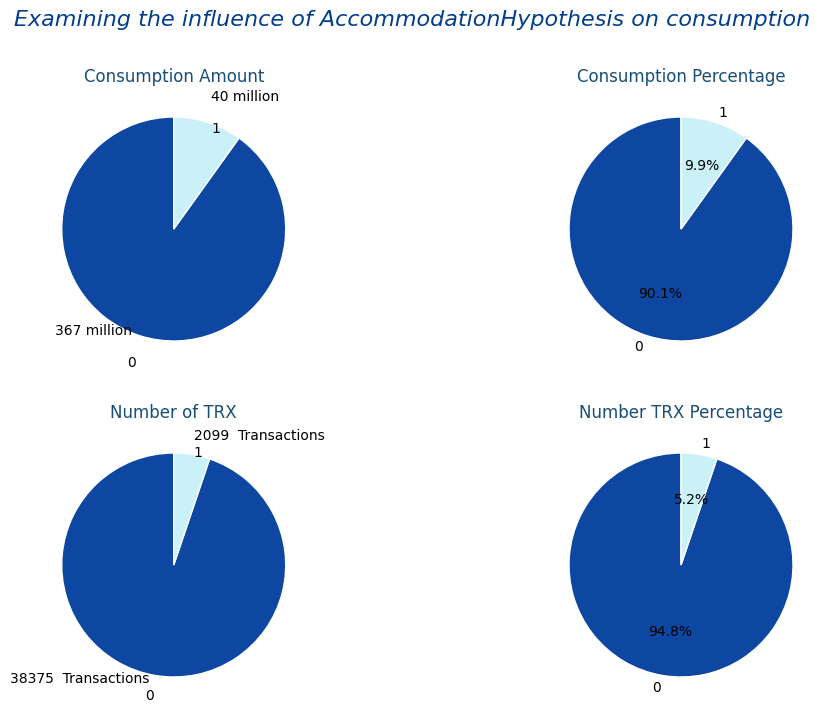

In [1017]:
accommodationMean_IP = df_IP["AccommodationLength"].mean()
accommodationStd_IP = df_IP["AccommodationLength"].std()

df_IP["AccommodationZscore"] = (df_IP["AccommodationLength"] - accommodationMean_IP) / accommodationStd_IP
df_IP["AccommodationHypothesis"] = df_IP["AccommodationZscore"].apply(HypothesisTest)

cost_subplots(df_IP, "AccommodationHypothesis")


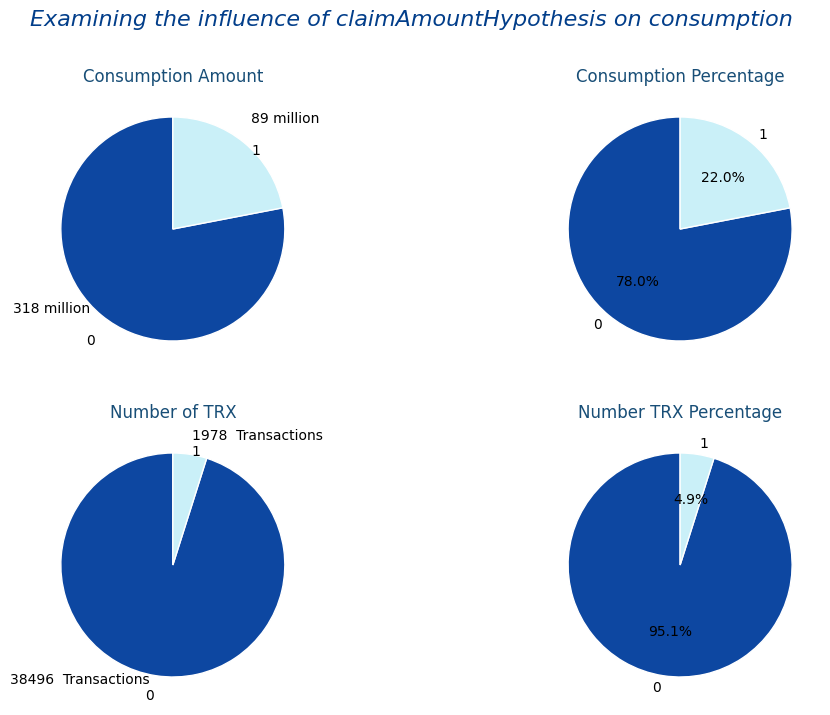

In [1018]:
claimamountMean_IP = df_IP["InscClaimAmtReimbursed"].mean()
claimamountStd_IP = df_IP["InscClaimAmtReimbursed"].std()
df_IP["claimAmountZscore"] = (df_IP["InscClaimAmtReimbursed"] - claimamountMean_IP) / claimamountStd_IP
df_IP["claimAmountHypothesis"] = df_IP["claimAmountZscore"].apply(HypothesisTest)
cost_subplots(df_IP, "claimAmountHypothesis")

what is the relation between claim clearance length and amount?


In [1019]:
claim_clearance_TRX_IP = df_IP.groupby("ClaimClearanceLength")["ClaimClearanceLength"].count().rename("Transaction_Count")
claim_clearance_amount_IP = df_IP.groupby("ClaimClearanceLength")["InscClaimAmtReimbursed"].sum().rename("Total_Claim_Amount")
claim_clearance_TRX_amount_IP = pd.merge(left=claim_clearance_TRX, right=claim_clearance_amount, 
                                    left_index=True, right_index=True).reset_index()
claim_clearance_TRX_amount_IP['AvgClaimAmount'] = np.round(claim_clearance_TRX_amount_IP['Total_Claim_Amount']
                                                        /claim_clearance_TRX_amount_IP['Transaction_Count'],2)



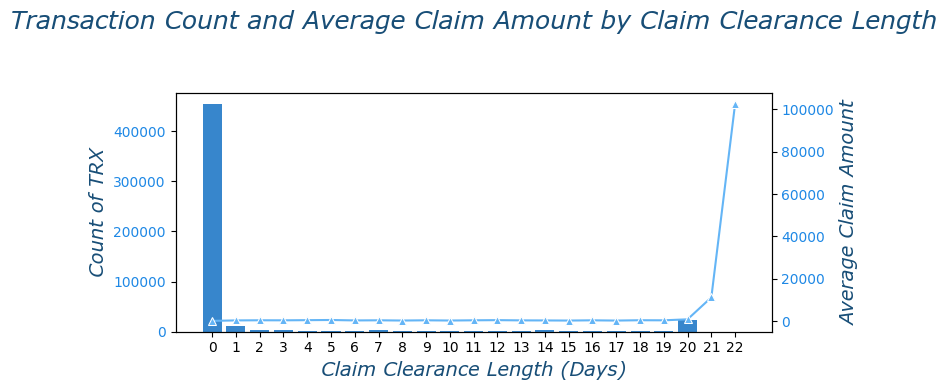

In [1020]:
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for 'count of TRX'
sns.barplot(data=claim_clearance_TRX_amount_IP, x=claim_clearance_TRX_amount_IP.index,
            y='Transaction_Count', ax=ax1, color=ascending_colors[2])
ax1.set_xlabel('Claim Clearance Length (Days)', fontdict=label_font_dict)
ax1.set_ylabel('Count of TRX', fontdict=label_font_dict)
ax1.tick_params(axis='y', labelcolor=ascending_colors[2])

# Create a secondary y-axis to plot 'AvgClaimAmount'
ax2 = ax1.twinx()
sns.lineplot(data=claim_clearance_TRX_amount, x=claim_clearance_TRX_amount.index,
            y='AvgClaimAmount', ax=ax2, color=ascending_colors[5], marker='^')
ax2.set_ylabel('Average Claim Amount', fontdict=label_font_dict)
ax2.tick_params(axis='y', labelcolor= ascending_colors[2])

# Title and layout
plt.title('Transaction Count and Average Claim Amount by Claim Clearance Length\n \n ', fontdict= title_font_dict)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We obtain similar results to outpatient data, suggesting that claims exceeding 20 days may indicate fraud.

* add new indicators ['service category' , 'admitted'] for future use.


In [1021]:
df_IP["service category"] = "inpatient"
df_IP["admitted"] = 1

In [1022]:
totalamountsperbene_IP1 = df_BENE.groupby('BeneID')["IPAnnualReimbursementAmt"].sum()
totalamountsperbene_IP2 = ((df_IP.groupby('BeneID')['InscClaimAmtReimbursed'].sum()) + (df_IP.groupby('BeneID')['DeductibleAmtPaid'].sum())).rename("IPamount")
mergingIP = pd.merge(left=totalamountsperbene_IP1, right=totalamountsperbene_IP2, on='BeneID' , how="inner")

mergingIP["amountValidation"] = np.where(
    (mergingIP["IPAnnualReimbursementAmt"] != mergingIP["IPamount"]),
    
    1,
    0
)
mergingIP = mergingIP.drop(columns=["IPAnnualReimbursementAmt", "IPamount"])
df_IP = pd.merge(left=df_IP, right=mergingIP, on="BeneID", how="left")


Inpatient Summary:
* Introduce and integrate new indicators into the analysis: these include ['ClaimClearanceLength', 'AccommodationLength',
       'clearanceZscore', 'clearanceHypothesis', 'AccommodationZscore',
       'AccommodationHypothesis', 'claimAmountZscore', 'claimAmountHypothesis',
       'service category', 'admitted' ]
* Examine and assess the connection between the duration it takes to clear insurance claims and the corresponding amounts involved in those claims. By doing so, we can gain valuable insights into how these factors influence consumption behaviors as well as healthcare utilization trends among different populations. Understanding this relationship can help us better grasp the implications for both consumers and healthcare providers in the context of financial transactions and service usage.

## *All Data EDA*

Merging the Dataset

In [1023]:
#merging outpatient & inpatient 
common_cols = [col for col in df_OP.columns if col in df_IP.columns]
df_OP_IP = pd.merge(left=df_OP, right=df_IP, left_on=common_cols, right_on=common_cols, how="outer")
df_OP_IP.shape

(558211, 41)

In [1024]:
#merging out_in & Beneficiary 

df_OP_IP_bene = pd.merge(left=df_OP_IP, right=df_BENE, left_on="BeneID", right_on="BeneID", how="inner")

df_OP_IP_bene.shape

(558211, 64)

In [1025]:
#merging OP_IP_bene & providers Potential Fraud labels 

df = pd.merge(left=df_OP_IP_bene, right=df_Pro, left_on= "Provider", right_on="Provider", how="inner")
df.shape

(558211, 65)

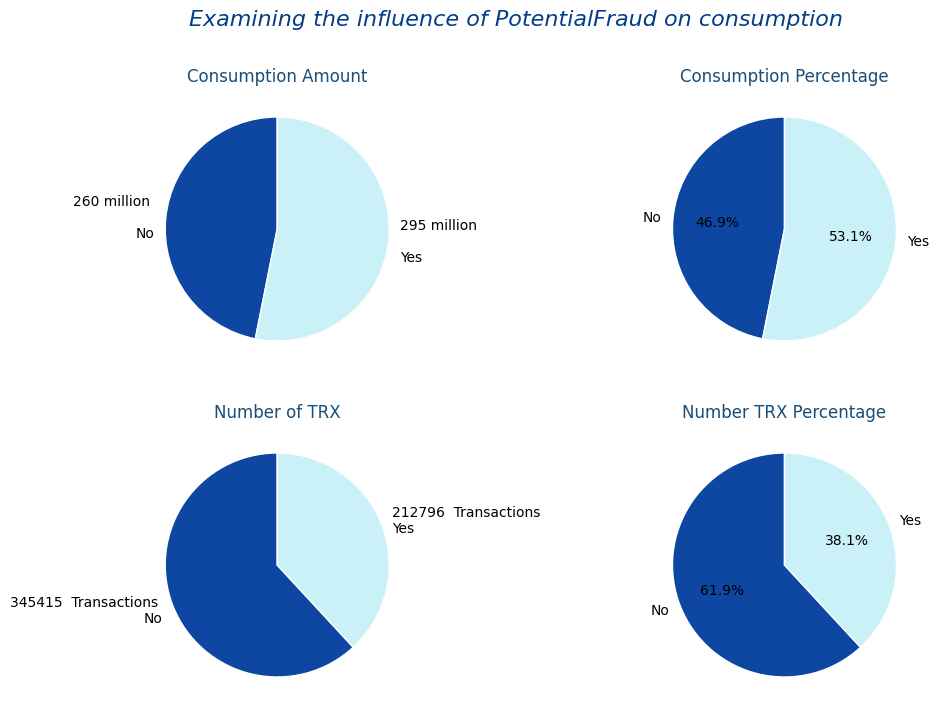

In [1026]:
cost_subplots(df,"PotentialFraud")

* The graph indicates that potential fraud constituted 53.1% of total consumption. 
* It's important to note that if a provider is suspected of fraud in one claim, this doesn't imply that all claims from that provider are fraudulent. 
* As a result, we must analyze the patterns among potential fraud claims.

1. what is the relation between hypothesis and potential?

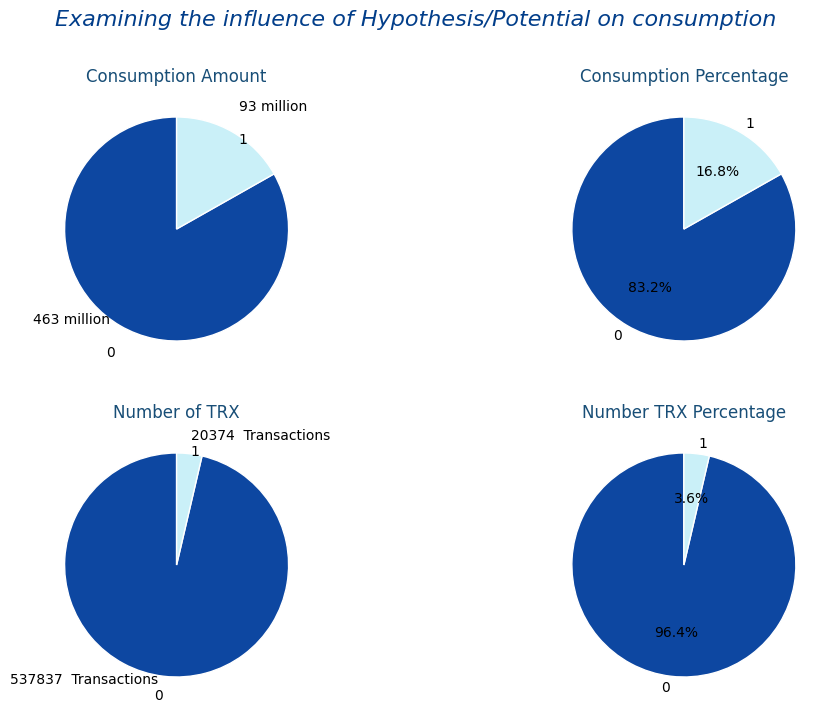

In [1027]:
df["Hypothesis/Potential"] = np.where(
    ((df["clearanceHypothesis"] == 1) |
    (df["AccommodationHypothesis"] == 1) |
    (df["claimAmountHypothesis"] == 1)) &
    (df["PotentialFraud"] == "Yes"),
    1,
    0
)
cost_subplots(df,"Hypothesis/Potential")

are there is relation between outpatient and admitted 

In [1028]:

admitted_value_counts = df[df['OPAnnualReimbursementAmt'] == 0]['admitted'].value_counts()

# Convert to a DataFrame for display
admitted_df = pd.DataFrame(admitted_value_counts)

# Print the DataFrame
print(admitted_df)


          count
admitted       
1          3909
0          1009


* Why did 3,909 admitted patients not have at least one consultation before admission? 
-       This is a significant indicator of an unusual situation.

-      what is the relation between [ 'Provider', 'AttendingPhysician',
                                 'OperatingPhysician','OtherPhysician'] and 'PotentialFraud'?

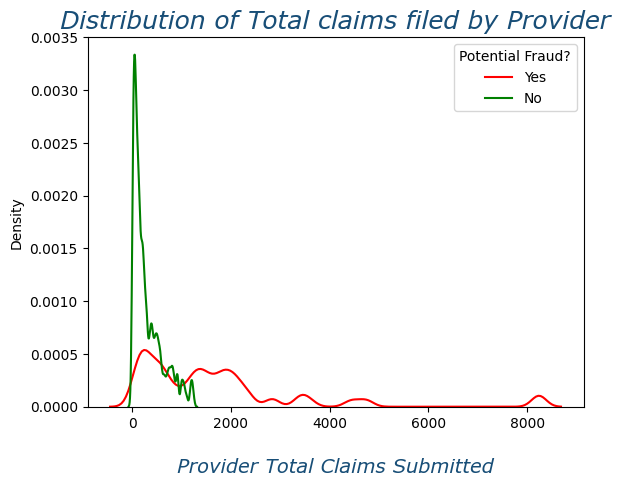

In [1029]:
df["Provider#TRX"] = df.groupby(["Provider"])['ClaimID'].transform('count')
sns.kdeplot(x=df[df["PotentialFraud"] == "Yes"]["Provider#TRX"], color="red")
sns.kdeplot(x=df[df["PotentialFraud"] == "No"]["Provider#TRX"], color="green")
plt.xlabel("\nProvider Total Claims Submitted", fontdict=label_font_dict)
plt.title("Distribution of Total claims filed by Provider", fontdict=title_font_dict)
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")
plt.show()

-      The graph indicates that providers with over 2000 total claims have a high likelihood of fraud.

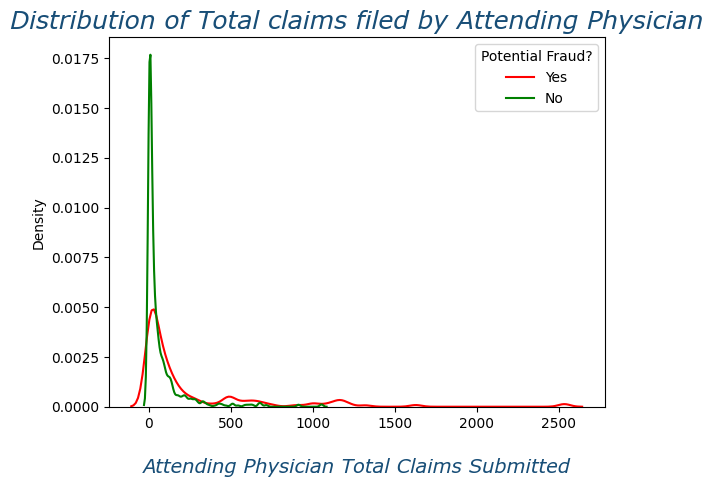

In [1030]:
df["AttendingPhysician#TRX"] = df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
sns.kdeplot(x=df[df["PotentialFraud"] == "Yes"]["AttendingPhysician#TRX"], color="red")
sns.kdeplot(x=df[df["PotentialFraud"] == "No"]["AttendingPhysician#TRX"], color="green")
plt.xlabel("\nAttending Physician Total Claims Submitted", fontdict=label_font_dict)
plt.title("Distribution of Total claims filed by Attending Physician", fontdict=title_font_dict)
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")
plt.show()

-      The graph indicates that Attending Physician with over 500 total claims have a high likelihood of fraud.

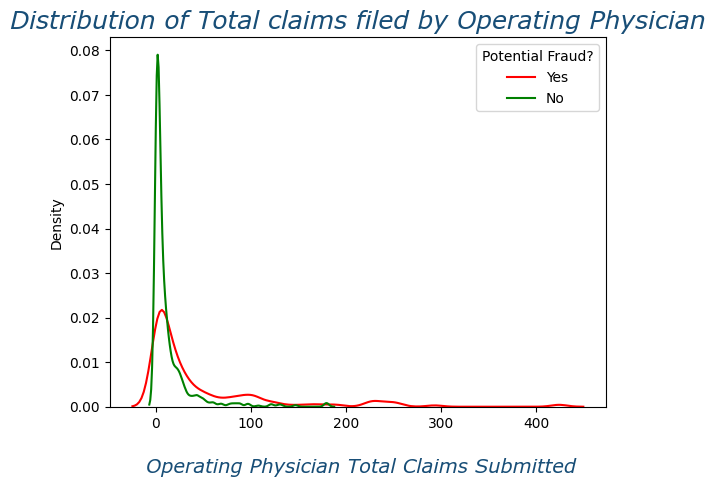

In [1031]:
df["OperatingPhysician#TRX"] = df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
sns.kdeplot(x=df[df["PotentialFraud"] == "Yes"]["OperatingPhysician#TRX"], color="red")
sns.kdeplot(x=df[df["PotentialFraud"] == "No"]["OperatingPhysician#TRX"], color="green")
plt.xlabel("\n Operating Physician Total Claims Submitted", fontdict=label_font_dict)
plt.title("Distribution of Total claims filed by Operating Physician", fontdict=title_font_dict)
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")
plt.show()

-      The graph indicates that Operating Physician with over 200 total claims have a high likelihood of fraud.

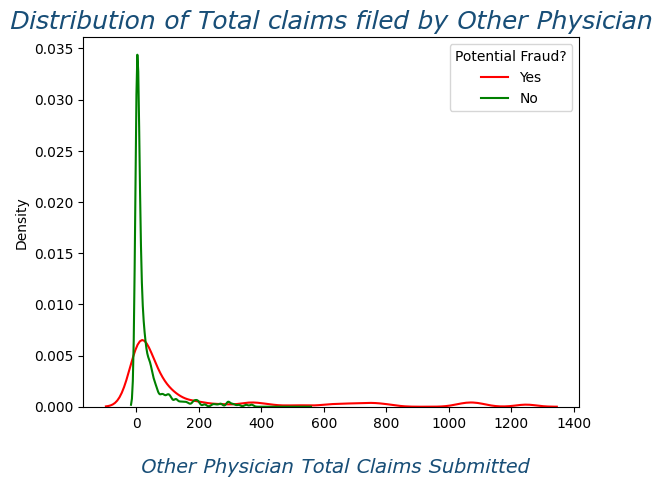

In [1032]:
df["OtherPhysician#TRX"] = df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
sns.kdeplot(x=df[df["PotentialFraud"] == "Yes"]["OtherPhysician#TRX"], color="red")
sns.kdeplot(x=df[df["PotentialFraud"] == "No"]["OtherPhysician#TRX"], color="green")
plt.xlabel("\n Other Physician Total Claims Submitted", fontdict=label_font_dict)
plt.title("Distribution of Total claims filed by Other Physician", fontdict=title_font_dict)
plt.legend(labels=["Yes", "No"], title="Potential Fraud?")
plt.show()

-      The graph indicates that Other Physician with over 300 total claims have a high likelihood of fraud.

-     Based on prior exploration, we can assume that if  
[ ('Provider' TRX > 2000 or 
    'AttendingPhysician' TRX > 500 or
        'OperatingPhysician' > 200 or
            'OtherPhysician' > 200 )] 
                this is sing of fraud 



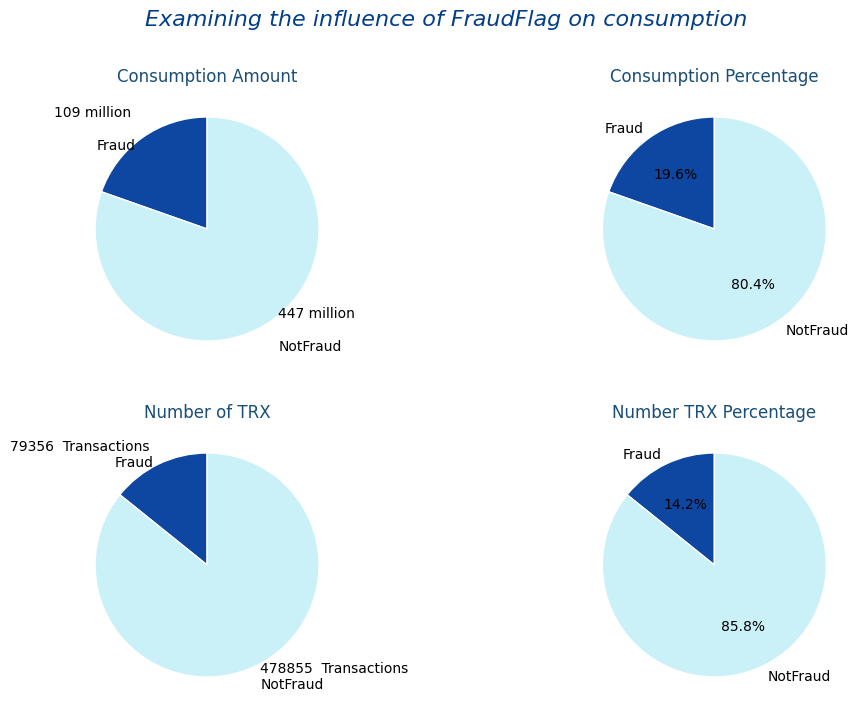

In [1033]:
df["FraudFlag"] = np.where(
    (((df['OPAnnualReimbursementAmt'] == 0) &
    (df['admitted'] == 1) &
    (df["PotentialFraud"] == "Yes"))
        
    |
    
    (((df["clearanceHypothesis"] == 1) &
    (df["AccommodationHypothesis"] == 1) &
    (df["claimAmountHypothesis"] == 1)) &
    (df["PotentialFraud"] == "Yes"))) 
    
    |
    
    ((df["amountValidation"] == 1 )&
    (df["PotentialFraud"] == "Yes")&
    (df["claimAmountHypothesis"] == 1))
    
    |
    (((df["Provider#TRX"] >= 2000) |
    (df["AttendingPhysician#TRX"] >= 500) |
    (df["OperatingPhysician#TRX"] >=  200) |
    (df["OtherPhysician#TRX"] >=  200)) &
    (df["PotentialFraud"] == "Yes"))
    ,
    
    "Fraud",
    "NotFraud"
)

cost_subplots(df,"FraudFlag")

### Conclusion

In this project, we developed an analytics framework for detecting healthcare claims fraud using data analysis and statistical techniques. By employing various hypotheses and validation checks, we identified patterns and anomalies indicative of fraudulent activities.

We established a `FraudFlag` based on multiple criteria, including zero reimbursement amounts, admission status, hypothesis validations, and high transaction counts among providers and physicians. This multi-faceted strategy enabled us to effectively flag potential fraud cases with high accuracy.

Key findings from our analysis include:

1. **Zero Reimbursement in outpatient and Admission**: Claims with both zero reimbursement amounts and patient admissions were strong indicators of potential fraud.
2. **Hypothesis Validations**: The integration of clearance, accommodation, and claim amount hypotheses offered a robust framework for fraud detection.
3. **Transaction Counts**: Elevated transaction counts for providers and physicians were significant predictors of fraudulent activities.

Visualizations illustrate the impact of fraud on consumption:

- **Consumption Amount**: Fraudulent claims totaled 19.6 million, while non-fraudulent claims reached 447 million.
- **Consumption Percentage**: Fraudulent claims represented 4.2% of total consumption, compared to 95.8% for non-fraudulent claims.
- **Number of Transactions (TRX)**: There were 79,356 fraudulent transactions versus 478,855 non-fraudulent transactions.
- **Transaction Percentage**: Fraudulent transactions accounted for 14.2% of the total, while non-fraudulent transactions comprised 85.8%.

These insights underscore the substantial financial impact of fraud on the healthcare system. Visualizing flagged cases provided valuable information on the distribution and characteristics of fraudulent claims, which can enhance fraud detection capabilities within healthcare insurance systems, thereby reducing financial losses and improving industry integrity.

Future efforts could focus on refining fraud detection criteria, integrating additional data sources, and exploring advanced machine learning models to further enhance accuracy and efficiency.
